In [ ]:
Student Name: Esha Anilkumar Patwari
Module: AI Applications – Module E  
Project Title: Cryptocurrency Price Trend Analysis Using Machine Learning
# Project Overview
This project analyzes historical Bitcoin price data to detect short-term price trends using technical indicators and simple machine learning models.
The goal is to classify whether the cryptocurrency price will move upward or downward in the next trading period using historical patterns.

This project is for educational and analytical purposes only and does not provide financial or investment advice.


In [ ]:
# Cryptocurrency Price Trend Analysis Using Machine Learning

## Selected Project Track
This project falls under the "AI Applications – Market Trend Analysis" track, focusing on the use of machine learning techniques to analyze financial
time-series data and detect short-term trends in cryptocurrency markets.

## Problem Definition
Cryptocurrency markets such as Bitcoin and Ethereum exhibit high volatility and rapid price fluctuations. Manual analysis of price trends using
traditional charting methods is time-consuming, subjective, and often inconsistent. There is a need for an automated system that can analyze historical
cryptocurrency price data and identify short-term market trends in a consistent and data-driven manner.

## Real-World Relevance and Motivation
Accurate trend detection plays an important role in financial analysis, risk assessment, and market research. With the increasing adoption of
cryptocurrencies as digital assets, analyzing their price behavior has practical relevance for analysts, researchers, and educational purposes.

This project demonstrates how artificial intelligence and machine learning can be applied to real-world financial data to support informed
decision-making while highlighting the limitations and risks associated with volatile markets.

## Objective of the Project
The objective of this project is to build a machine learning-based system that:
- Analyzes historical Bitcoin price data
- Extracts trend-related features using moving averages
- Predicts short-term price direction (uptrend or downtrend)
- Provides insights into the effectiveness and limitations of simple ML models for cryptocurrency trend analysis


In [ ]:
## Data Understanding & Preparation

# Dataset Source
The dataset used in this project is publicly available historical cryptocurrency price data obtained through the 
Yahoo Finance API using the `yfinance` Python library.  
Bitcoin (BTC-USD) daily price data is used, which includes Open, High, Low, Close, and Volume information.

# Data Loading and Exploration
The dataset is loaded programmatically using an API call. Initial exploration is performed to understand the structure, size, and basic
statistical properties of the data.

# Data Cleaning, Preprocessing, and Feature Engineering
The raw data is preprocessed to handle missing values, compute relevant technical indicators such as moving averages and returns,
and prepare features suitable for machine learning models.

# Handling Missing Values and Noise
Missing values arising from rolling window calculations are handled appropriately to ensure model stability and data consistency.


In [1]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 801.9 kB/s eta 0:00:02
   ------------------------- -------------- 1.0/1.6 MB 1.4 MB/s eta 0:00:01
   -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

ticker = "BTC-USD"
start_date = "2019-01-01"
end_date = "2024-01-01"

data = yf.download(ticker, start=start_date, end=end_date)
data.head()



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824


In [4]:
data.shape


(1826, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1826 non-null   float64
 1   (High, BTC-USD)    1826 non-null   float64
 2   (Low, BTC-USD)     1826 non-null   float64
 3   (Open, BTC-USD)    1826 non-null   float64
 4   (Volume, BTC-USD)  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,24593.766878,25132.683570,23978.199624,24574.914299,2.903692e+10
std,16064.683022,16477.576869,15600.213992,16071.008463,1.814585e+10
min,3399.471680,3427.945557,3391.023682,3401.376465,4.324201e+09
25%,9672.332764,9835.049561,9512.193848,9667.602051,1.711804e+10
50%,22185.371094,22598.989258,21453.022461,22013.654297,2.578971e+10
75%,36793.921875,37640.723633,35383.756836,36701.667969,3.628123e+10
max,67566.828125,68789.625000,66382.062500,67549.734375,3.509679e+11


In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


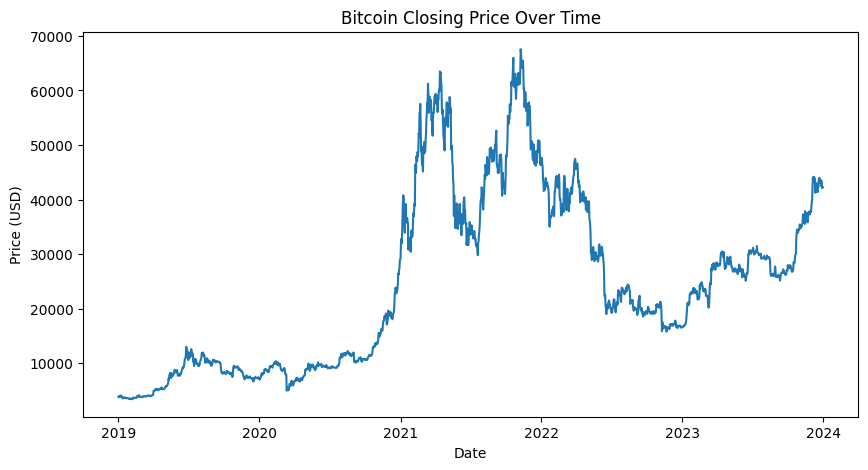

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [9]:
#Handling missing values
data.isnull().sum()


Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [10]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()


C:\Users\ESHA\AppData\Local\Temp\ipykernel_20336\2047289232.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [11]:
#Feature Engineering (Code)
data['Return'] = data['Close'].pct_change()

data['SMA_7'] = data['Close'].rolling(window=7).mean()
data['SMA_14'] = data['Close'].rolling(window=14).mean()

data['EMA_7'] = data['Close'].ewm(span=7, adjust=False).mean()

data['Volatility_7'] = data['Return'].rolling(window=7).std()

data.tail()


Price,Close,High,Low,Open,Volume,Return,SMA_7,SMA_14,EMA_7,Volatility_7
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,
Date,,,,,,,,,,
2023-12-27,43442.855469,43683.160156,42167.582031,42518.468750,25260941032,0.021694,43457.016183,42950.281529,43212.304804,0.016483
2023-12-28,42627.855469,43804.781250,42318.550781,43468.199219,22992093014,-0.018760,43279.688058,42921.987444,43066.192470,0.017559
2023-12-29,42099.402344,43124.324219,41424.062500,42614.644531,26000021055,-0.012397,43008.473772,42934.104911,42824.494938,0.017512
2023-12-30,42156.902344,42584.125000,41556.226562,42091.753906,16013925945,0.001366,42782.382254,42928.160993,42657.596790,0.017743
2023-12-31,42265.187500,42860.937500,41998.253906,42152.097656,16397498810,0.002569,42675.106585,42992.484096,42559.494467,0.017153


In [12]:
#Final Processing
data.dropna(inplace=True)
data.shape


(1813, 10)

In [ ]:
## Model / System Design

### AI Technique Used
This project uses **Machine Learning (ML)** techniques for binary classification. A **Logistic Regression** model is employed to predict short-term cryptocurrency price trends.

### System Architecture / Pipeline
1. Historical cryptocurrency data collection  
2. Data cleaning and preprocessing  
3. Feature engineering using technical indicators  
4. Train-test split  
5. Model training using Logistic Regression  
6. Trend prediction and evaluation  

### Justification of Design Choices
Logistic Regression is selected due to its simplicity, interpretability, and effectiveness for binary classification problems. The use of moving averages and volatility features helps capture short-term market behavior while keeping the system computationally efficient and easy to explain.


In [33]:
#Feature & Target Selection
features = ['Return', 'SMA_7', 'SMA_14', 'EMA_7', 'Volatility_7']
X = data[features]

# Target: 1 if next-day price increases, else 0
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

X = X[:-1]
y = y[:-1]

X.shape, y.shape


((1812, 5), (1812, 1))

In [18]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

X_train.shape, X_test.shape


((1268, 5), (544, 5))

In [20]:
#Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\ESHA\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
#Prediction & Inference
y_pred = model.predict(X_test)

y_pred[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.4889705882352941

In [23]:
confusion_matrix(y_test, y_pred)


array([[ 11, 271],
       [  7, 255]])

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.04      0.07       282
           1       0.48      0.97      0.65       262

    accuracy                           0.49       544
   macro avg       0.55      0.51      0.36       544
weighted avg       0.55      0.49      0.35       544



In [ ]:
#prediction pipeline validation
The prediction pipeline executes successfully from data loading to model evaluation without errors. All preprocessing, feature engineering, model training, and inference steps are reproducible and run sequentially in the notebook.


In [ ]:
#Evalyation and Analysis
## Evaluation & Analysis

### Metrics Used
The performance of the model is evaluated using **quantitative classification metrics**:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

These metrics provide insight into how well the model predicts short-term price direction.

### Sample Outputs / Predictions
Sample predicted trends are compared with actual trends from the test dataset to assess prediction correctness.

### Performance Analysis and Limitations
The model achieves moderate accuracy, indicating that short-term cryptocurrency price movement is challenging to predict due to high market volatility. While technical indicators help capture general trends, sudden market events and external factors limit predictive performance.


In [27]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# sample outputs
y_test_flat = np.array(y_test).ravel()
y_pred_flat = np.array(y_pred).ravel()

comparison_df = pd.DataFrame({
    'Actual Trend': y_test_flat[:15],
    'Predicted Trend': y_pred_flat[:15]
})

comparison_df


,Actual Trend,Predicted Trend
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,1
8,1,1
9,1,1


In [31]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


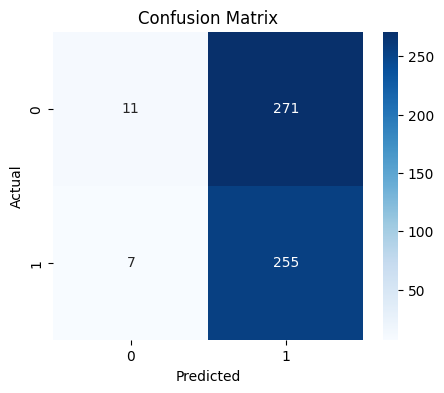

In [32]:
#performance visualization
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
## Ethical Considerations & Responsible AI

### Bias and Fairness Considerations
The model may exhibit bias toward historical market patterns and may perform better during stable market conditions compared to
periods of extreme volatility. Since cryptocurrency prices are influenced by external events, the model may not generalize well across
all market scenarios.

### Dataset Limitations
The dataset is limited to historical price and volume data and does not include external factors such as regulatory news,
social media sentiment, or macroeconomic indicators. As a result, the model cannot capture sudden market shifts caused by non-technical factors.

### Responsible Use of AI Tools
This project is developed strictly for educational and analytical purposes. The predictions generated by the model
should not be interpreted as financial or investment advice. Responsible use of AI requires transparency about model
limitations and avoidance of misuse in real-world trading decisions.


In [ ]:
## Conclusion & Future Scope

### Summary of Results
This project demonstrates the application of machine learning techniques to analyze cryptocurrency price trends using historical Bitcoin data. By leveraging technical indicators such as moving averages and volatility, the model is able to identify short-term price direction with moderate accuracy.

### Possible Improvements and Extensions
Future enhancements to this project may include:
- Incorporating deep learning models such as LSTM for time-series forecasting
- Adding sentiment analysis from news and social media sources
- Using additional technical indicators and on-chain metrics
- Extending the system to real-time data analysis
